In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wandb


from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency,f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
dataset = pd.read_csv("BankChurners.csv")

In [3]:
dataset.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
dataset = dataset.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [6]:
print('Rows : %d, Columns : %d' % dataset.shape)

Rows : 10127, Columns : 20


In [7]:
dataset.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Exploratory Data Analysis

###### Numerical Variables

In [9]:
numerical_var = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
numerical_var

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

###### Discrete variables

In [10]:
discrete_var = [feature for feature in numerical_var if dataset[feature].nunique() < 25]
discrete_var

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

###### Continous Variables

In [11]:
continuous_var = [feature for feature in numerical_var if feature not in discrete_var]
continuous_var

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

###### Categorical variables

In [12]:
categorical_var = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
categorical_var

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Text(0.5, 1.0, 'Presentase Customer Churn')

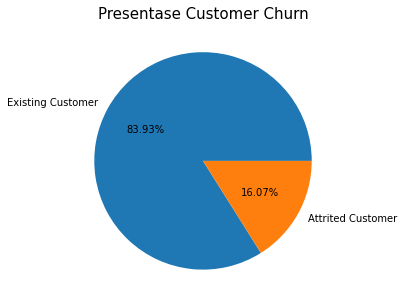

In [13]:
plt.figure(figsize=(15,5))
plt.pie(dataset['Attrition_Flag'].value_counts(),labels=dataset['Attrition_Flag'].value_counts().index, autopct='%.2f%%')
plt.title("Presentase Customer Churn", fontsize=15)

In [14]:
dataset['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

Text(0, 0.5, 'Total')

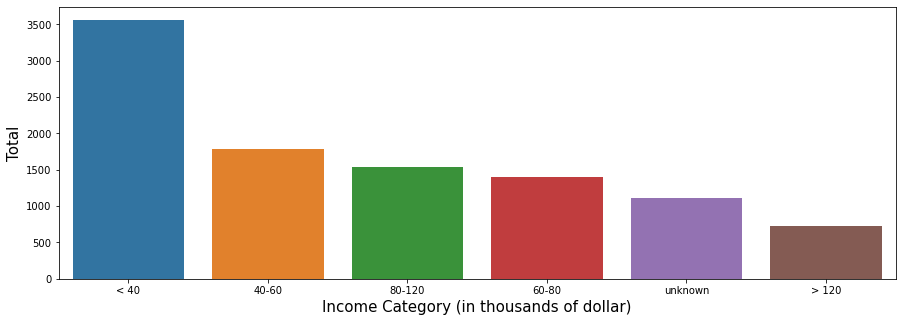

In [15]:
plt.figure(figsize=(15,5))
g= sns.countplot(data=dataset, x='Income_Category', order= dataset['Income_Category'].value_counts(ascending=False).index)
g.set_xticklabels(['< 40','40-60','80-120','60-80','unknown','> 120'])
plt.xlabel('Income Category (in thousands of dollar)',fontsize=15)
plt.ylabel('Total',fontsize=15)

In [16]:
dataset.groupby('Income_Category')['Attrition_Flag'].value_counts()

Income_Category  Attrition_Flag   
$120K +          Existing Customer     601
                 Attrited Customer     126
$40K - $60K      Existing Customer    1519
                 Attrited Customer     271
$60K - $80K      Existing Customer    1213
                 Attrited Customer     189
$80K - $120K     Existing Customer    1293
                 Attrited Customer     242
Less than $40K   Existing Customer    2949
                 Attrited Customer     612
Unknown          Existing Customer     925
                 Attrited Customer     187
Name: Attrition_Flag, dtype: int64

In [17]:
dataset['Income_Category'].value_counts(ascending=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

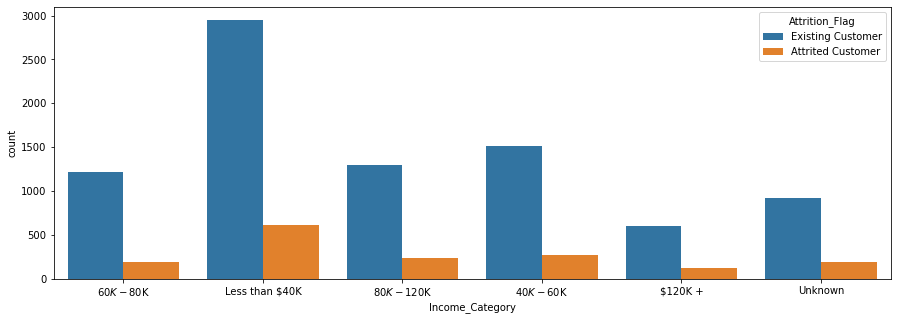

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x='Income_Category',hue='Attrition_Flag')

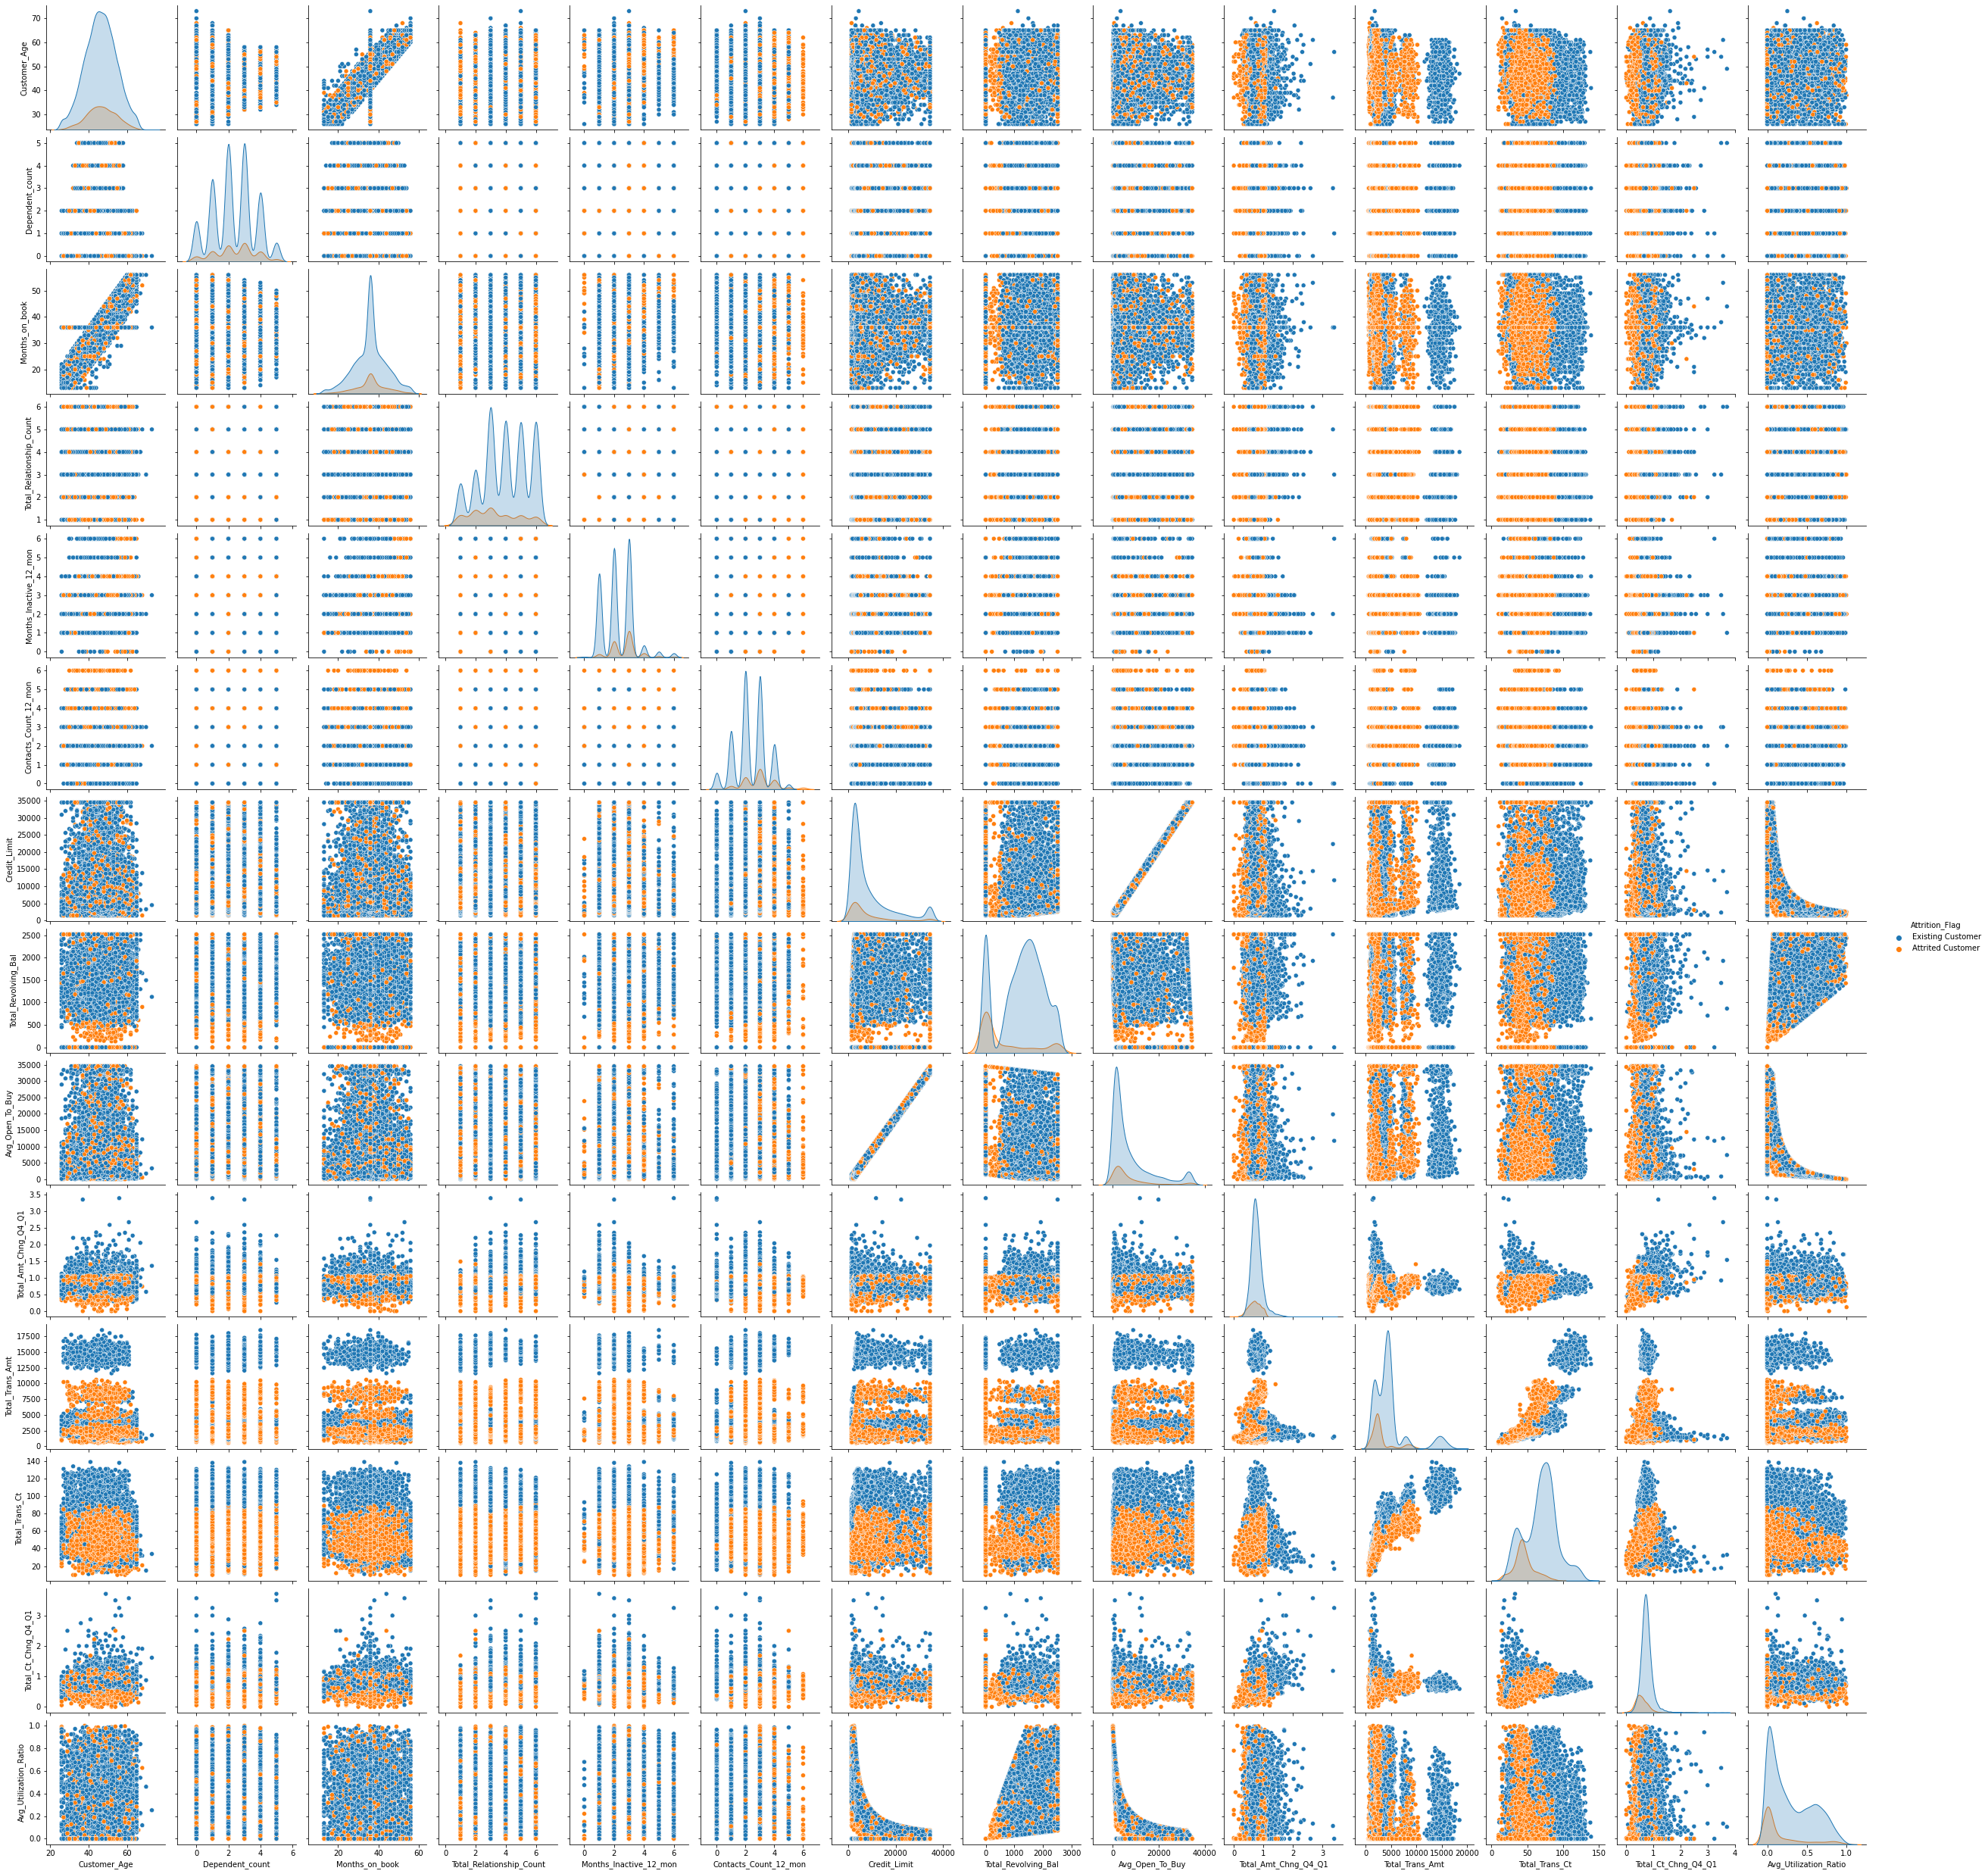

In [19]:
sns.pairplot(dataset,hue='Attrition_Flag')

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Credit_Limit'>

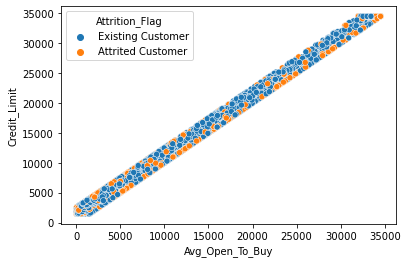

In [20]:
sns.scatterplot(data=dataset, x='Avg_Open_To_Buy', y='Credit_Limit',hue='Attrition_Flag')

<AxesSubplot:xlabel='Months_on_book', ylabel='Customer_Age'>

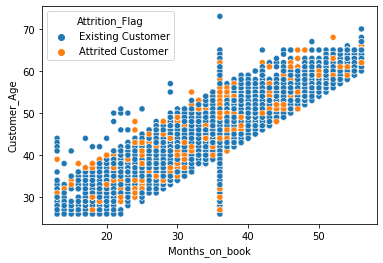

In [21]:
sns.scatterplot(data=dataset, x='Months_on_book', y='Customer_Age',hue='Attrition_Flag')

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Total_Ct_Chng_Q4_Q1'>

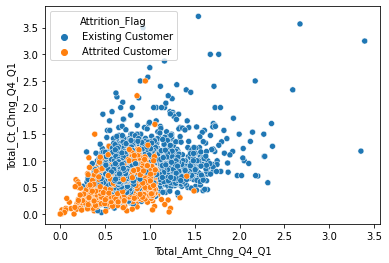

In [22]:
sns.scatterplot(data=dataset, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1',hue='Attrition_Flag')

In [23]:
dataset.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [24]:
print(dataset[['Avg_Open_To_Buy','Credit_Limit']].corr())
print('\n')
print(dataset[['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']].corr())
print('\n')
print(dataset[['Months_on_book','Customer_Age']].corr())

                 Avg_Open_To_Buy  Credit_Limit
Avg_Open_To_Buy         1.000000      0.995981
Credit_Limit            0.995981      1.000000


                      Total_Amt_Chng_Q4_Q1  Total_Ct_Chng_Q4_Q1
Total_Amt_Chng_Q4_Q1              1.000000             0.384189
Total_Ct_Chng_Q4_Q1               0.384189             1.000000


                Months_on_book  Customer_Age
Months_on_book        1.000000      0.788912
Customer_Age          0.788912      1.000000


<AxesSubplot:xlabel='Avg_Open_To_Buy'>

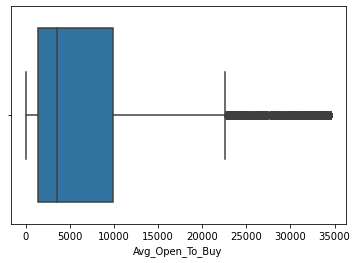

In [25]:
sns.boxplot(data=dataset, x='Avg_Open_To_Buy')

In [26]:
Q1 = dataset['Avg_Open_To_Buy'].quantile(q=0.25)
Q3 = dataset['Avg_Open_To_Buy'].quantile(q=0.75)
IQR = Q3 - Q1
lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5
print('Q1 : ', Q1)
print('Q3 : ', Q3)
print('lower boundary: ', lower)
print('upper boundary: ', upper)

Q1 :  1324.5
Q3 :  9859.0
lower boundary:  -11477.25
upper boundary:  22660.75


In [27]:
dataset.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

# Preprocessing

### Feature Engineering

In [28]:
df = dataset.copy()

In [29]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

###### Check missing values

In [30]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

###### Change categorical variables into numerical

In [31]:
df['Attrition_Flag_code'] = pd.get_dummies(df['Attrition_Flag'],drop_first=True)
df['Gender_code'] = pd.get_dummies(df['Gender'],drop_first=True)
df['Education_Level_code'] = df['Education_Level'].apply(lambda x : 1 if x == 'Uneducated' else (2 if x == 'High School' else (3 if x == 'College' else (4 if x == 'Graduate' else (5 if x == 'Post-Graduate' else (6 if x == 'Doctorate' else 0))))))
marital_dummies = pd.get_dummies(df[['Marital_Status','Attrition_Flag_code']],columns=['Marital_Status'])
df['Income_Category_code'] = df['Income_Category'].apply(lambda x : 1 if x == 'Less than $40K' else (2 if x == '$40K - $60K' else (3 if x == '$60K - $80K' else (4 if x == '$80K - $120K' else (5 if x == '$120K +' else 0)))))
df['Card_Category_code'] = df['Card_Category'].apply(lambda x : 0 if x == 'Blue' else (1 if x == 'Silver' else (2 if x == 'Gold' else 3)))


In [32]:
df = df.drop(['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1)

In [33]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Income_Category_code', 'Card_Category_code'],
      dtype='object')

In [34]:
df_categorical = []

for x in categorical_var:
    df_categorical.append(x + '_code')

In [35]:
df_categorical

['Attrition_Flag_code',
 'Gender_code',
 'Education_Level_code',
 'Marital_Status_code',
 'Income_Category_code',
 'Card_Category_code']

###### Feature Selection

##### 1. categorical feature selection

In [36]:
df_categorical.remove('Marital_Status_code')

In [37]:
df_categorical

['Attrition_Flag_code',
 'Gender_code',
 'Education_Level_code',
 'Income_Category_code',
 'Card_Category_code']

In [38]:
## chi square analysis

chi2_check = []
p_values = []
for feature in df_categorical[1:]:   
    if chi2_contingency(pd.crosstab(df['Attrition_Flag_code'],df[feature]))[1] <= 0.05:
        chi2_check.append('Reject Null Hypothesis')
        p_values.append(chi2_contingency(pd.crosstab(df['Attrition_Flag_code'],df[feature]))[1])
    else:
        chi2_check.append('Accept Null Hypothesis')
        p_values.append(chi2_contingency(pd.crosstab(df['Attrition_Flag_code'],df[feature]))[1])

data = pd.DataFrame(data=[df_categorical[1:],chi2_check,p_values]).T
data.columns = ['Column','Hypothesis','P-value']


In [39]:
marital = []
chi2_check2 = []
p_values2 = []

for x in marital_dummies.columns:
    marital.append(x)
    
for feature in marital[1:]:   
    if chi2_contingency(pd.crosstab(marital_dummies['Attrition_Flag_code'],marital_dummies[feature]))[1] <= 0.05:
        chi2_check2.append('Reject Null Hypothesis')
        p_values2.append(chi2_contingency(pd.crosstab(marital_dummies['Attrition_Flag_code'],marital_dummies[feature]))[1])
    else:
        chi2_check2.append('Accept Null Hypothesis')
        p_values2.append(chi2_contingency(pd.crosstab(marital_dummies['Attrition_Flag_code'],marital_dummies[feature]))[1])

data2 = pd.DataFrame(data=[marital[1:],chi2_check2,p_values2]).T
data2.columns = ['Column','Hypothesis','P-value']


In [40]:
data_hypothesis = pd.concat([data,data2],ignore_index= True)

In [41]:
data_hypothesis

Column              Hypothesis      P-value
0              Gender_code  Reject Null Hypothesis  0.000196358
1     Education_Level_code  Accept Null Hypothesis    0.0514891
2     Income_Category_code  Reject Null Hypothesis    0.0250024
3       Card_Category_code  Accept Null Hypothesis     0.525238
4  Marital_Status_Divorced  Accept Null Hypothesis     0.973043
5   Marital_Status_Married  Reject Null Hypothesis    0.0182042
6    Marital_Status_Single  Accept Null Hypothesis    0.0590313
7   Marital_Status_Unknown  Accept Null Hypothesis     0.398468

In [42]:
data_hypothesis[data_hypothesis['Hypothesis'] == 'Reject Null Hypothesis']

Column              Hypothesis      P-value
0             Gender_code  Reject Null Hypothesis  0.000196358
2    Income_Category_code  Reject Null Hypothesis    0.0250024
5  Marital_Status_Married  Reject Null Hypothesis    0.0182042

In [43]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Income_Category_code', 'Card_Category_code'],
      dtype='object')

In [44]:
# drop features have no relationship with Attrition Flag
df = df.drop(['Education_Level_code','Card_Category_code'],axis=1)

In [45]:
df = pd.concat([df,marital_dummies['Marital_Status_Married']],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Attrit

In [47]:
df['Attrition_Flag_code'] = df['Attrition_Flag_code'].astype('int64')
df['Gender_code'] = df['Gender_code'].astype('int64')
df['Marital_Status_Married'] = df['Marital_Status_Married'].astype('int64')
df['Income_Category_code'] = df['Income_Category_code'].astype('int64')

###### 2. Numerical feature selection

In [48]:
numerical_var

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [49]:
f_values = []
p_values = []
hypothesis = []

for feature in numerical_var:
    if(f_classif(df[[feature]],df[['Attrition_Flag_code']])[1] <= 0.05):
        hypothesis.append("Reject Null Hypothesis")
        f_values.append(f_classif(df[[feature]],df[['Attrition_Flag_code']])[0][0])
        p_values.append(f_classif(df[[feature]],df[['Attrition_Flag_code']])[1][0])
    else:
        hypothesis.append("Accept Null Hypothesis")
        f_values.append(f_classif(df[[feature]],df[['Attrition_Flag_code']])[0][0])
        p_values.append(f_classif(df[[feature]],df[['Attrition_Flag_code']])[1][0])

numerical_relationship = pd.DataFrame(data=[numerical_var,f_values,p_values,hypothesis]).T
numerical_relationship.columns = ['Column','F-Values','p-values','Hypothesis']

C:\Users\roiha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\roiha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\roiha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\roiha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [50]:
numerical_relationship

Column    F-Values      p-values              Hypothesis
0               Customer_Age     3.35607     0.0669869  Accept Null Hypothesis
1            Dependent_count     3.65283     0.0560024  Accept Null Hypothesis
2             Months_on_book     1.89707      0.168437  Accept Null Hypothesis
3   Total_Relationship_Count     233.073   4.82928e-52  Reject Null Hypothesis
4     Months_Inactive_12_mon      240.91   1.03266e-53  Reject Null Hypothesis
5      Contacts_Count_12_mon     441.868   4.69749e-96  Reject Null Hypothesis
6               Credit_Limit     5.77373     0.0162854  Reject Null Hypothesis
7        Total_Revolving_Bal     752.702  6.63015e-160  Reject Null Hypothesis
8            Avg_Open_To_Buy  0.00082285      0.977116  Accept Null Hypothesis
9       Total_Amt_Chng_Q4_Q1     176.962   4.83664e-40  Reject Null Hypothesis
10           Total_Trans_Amt     296.228   1.85744e-65  Reject Null Hypothesis
11            Total_Trans_Ct     1620.12             0  Reject Null Hypothesis
12       Total_Ct_Chng_Q4_Q1     930.078  1.64772e-195  Reject Null Hypothesis
13     Avg_Utilization_Ratio     332.877   3.35769e-73  Reject Null Hypothesis

##### Drop columns that 'Accept Null Hypothesis' or have no correlation with dependent variable

In [51]:
numerical_relationship[numerical_relationship['Hypothesis'] == 'Accept Null Hypothesis']['Column'].tolist()

df = df.drop(numerical_relationship[numerical_relationship['Hypothesis'] == 'Accept Null Hypothesis']['Column'].tolist(), axis=1)

##### check multicollinearity

<AxesSubplot:>

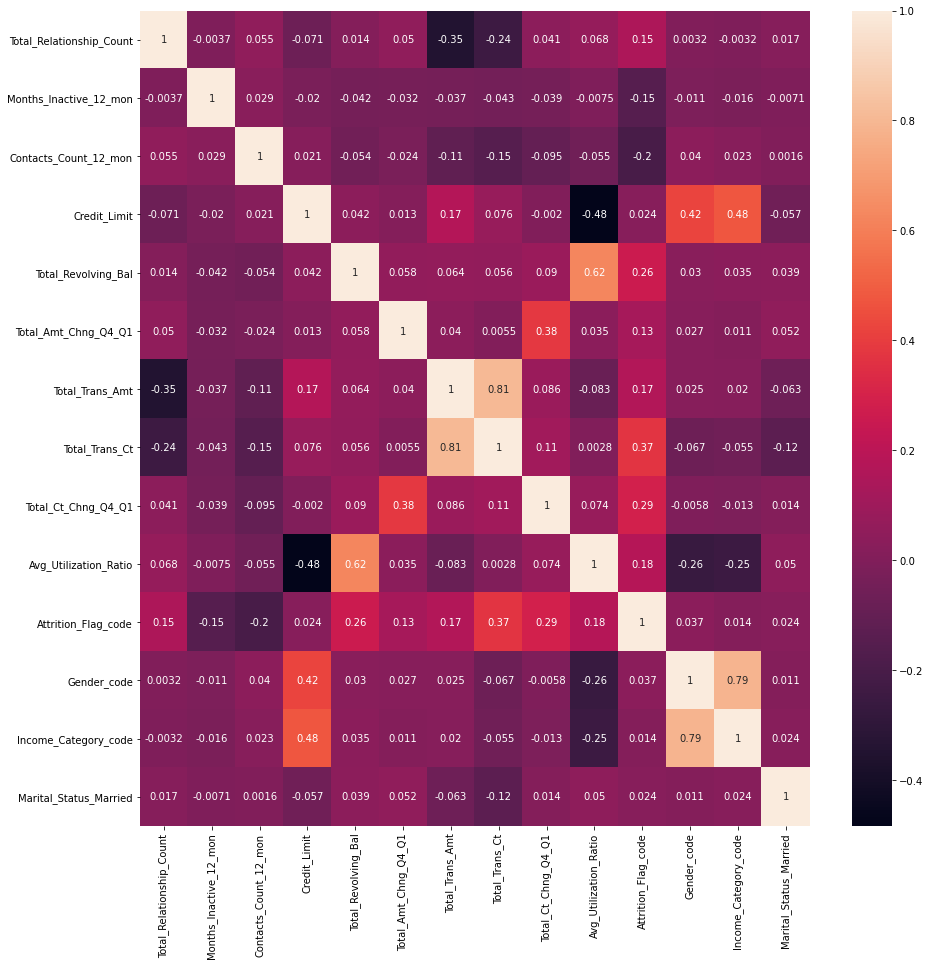

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True)

There is no multicollinearity between each independent variables or correlation between each independent variables are less than 0.9 so that there is no multicollinearity

##### Normalization

In [53]:
X = df.drop('Attrition_Flag_code',axis=1)
y = df['Attrition_Flag_code'].values

In [54]:
scaler = StandardScaler()

In [55]:
scaled_data = scaler.fit_transform(X)

###### Handling imbalanced data

In [56]:
oversample = SMOTE()

In [57]:
scaled_data, y = oversample.fit_resample(scaled_data,y)

##### Splitting data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42)

##### Modeling

###### 1. KNN

In [59]:
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
algorithm = ['auto'] #['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(start = 10, stop= 100, num= 10)]
p = [1,2]
random_grid = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p' : p
}

knn_model = KNeighborsClassifier()
knn_randomcv = RandomizedSearchCV(estimator= knn_model, param_distributions= random_grid, n_iter= 25, cv = 5, verbose= 2, random_state= 100, n_jobs= 1)
knn_randomcv.fit(X_train, y_train)
print("Best: %f using %s" % (knn_randomcv.best_score_, knn_randomcv.best_params_))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto, total=   0.7s
[CV] weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto, total=   0.7s
[CV] weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=13, leaf_size=40, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=70, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=9, leaf_size=70, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=70, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=9, leaf_size=70, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=70, algorithm=auto 
[CV]  weights=distance, p=1

[CV]  weights=distance, p=1, n_neighbors=15, leaf_size=90, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=15, leaf_size=90, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=15, leaf_size=90, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=15, leaf_size=90, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=15, leaf_size=90, algorithm=auto, total=   0.5s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto, total=   0.5s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto, total=   0.5s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto, total=   0.6s
[CV] weights=distance, p=1, n_neighbors=9, leaf_size=80, algorithm=auto 
[CV]  weights=distance, p=1, 

[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=80, algorithm=auto, total=   0.9s
[CV] weights=uniform, p=1, n_neighbors=11, leaf_size=80, algorithm=auto 
[CV]  weights=uniform, p=1, n_neighbors=11, leaf_size=80, algorithm=auto, total=   0.9s
[CV] weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto, total=   0.9s
[CV] weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto, total=   0.8s
[CV] weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto, total=   0.7s
[CV] weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto 
[CV]  weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto, total=   0.5s
[CV] weights=distance, p=1, n_neighbors=5, leaf_size=60, algorithm=auto 
[CV]  weights=distance, p=1, n_nei

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.4min finished


###### 2. Decision Tree

In [71]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train,y_train)

DecisionTreeClassifier()

##### 3. Random Forest

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [100]:
# Predict label

# KNN
y_pred = knn_randomcv.predict(X_test)
y_pred_train = knn_randomcv.predict(X_train)

# Decision Tree
y_pred_dc = dc_model.predict(X_test)
y_pred_dc_train = dc_model.predict(X_train)

# Random Forest
y_pred_rf = rf_randomcv.predict(X_test)
y_pred_rf_train = rf_randomcv.predict(X_train)


# Predict probability
y_pred_proba = knn_randomcv.predict_proba(X_test)
y_pred_proba_dc = dc_model.predict_proba(X_test)
y_pred_proba_rf = rf_randomcv.predict_proba(X_test)

##### Evaluation metrics using confusion matrix

##### Evaluation metric of KNN

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2548
           1       0.99      0.93      0.96      2552

    accuracy                           0.96      5100
   macro avg       0.96      0.96      0.96      5100
weighted avg       0.96      0.96      0.96      5100



In [63]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5952
           1       1.00      1.00      1.00      5948

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



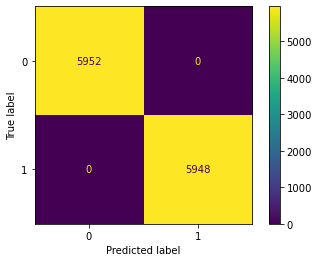

In [66]:
# confusion matrix training
plot_confusion_matrix(knn_randomcv, X_train, y_train)

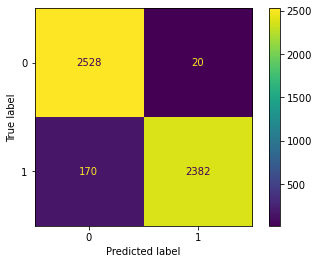

In [67]:
# confusion matrix testing
plot_confusion_matrix(knn_randomcv, X_test, y_test)

###### Evaluation metric of Decision Tree

In [74]:
print(classification_report(y_train,y_pred_dc_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5952
           1       1.00      1.00      1.00      5948

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



In [75]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2548
           1       0.94      0.94      0.94      2552

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



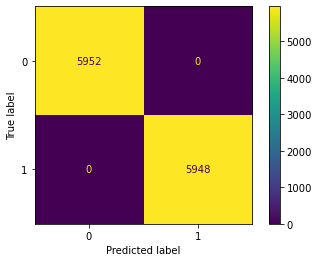

In [76]:
plot_confusion_matrix(dc_model, X_train, y_train)

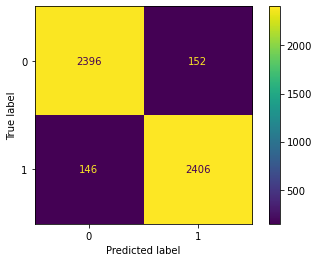

In [77]:
plot_confusion_matrix(dc_model, X_test, y_test)

##### Evaluation metric of random forest

In [101]:
print(classification_report(y_train,y_pred_rf_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5952
           1       1.00      1.00      1.00      5948

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



In [102]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2548
           1       0.98      0.97      0.97      2552

    accuracy                           0.97      5100
   macro avg       0.97      0.97      0.97      5100
weighted avg       0.97      0.97      0.97      5100



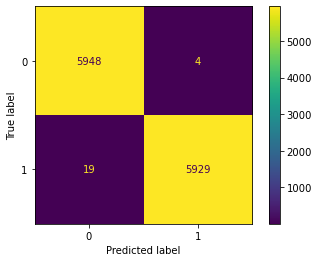

In [103]:
plot_confusion_matrix(rf_randomcv, X_train, y_train)

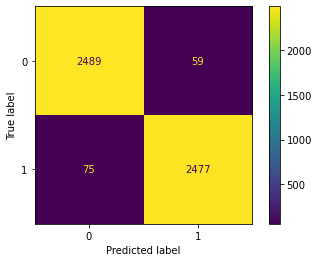

In [104]:
plot_confusion_matrix(rf_randomcv, X_test, y_test)

###### Evaluation using ROC AUC

In [68]:
print(dataset['Attrition_Flag'].value_counts())
print(df['Attrition_Flag_code'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
1    8500
0    1627
Name: Attrition_Flag_code, dtype: int64


In [105]:
## get existing customer(1) probability
y_pred_proba = y_pred_proba[:,1]
y_pred_proba_dc = y_pred_proba_dc[:,1]
y_pred_proba_rf = y_pred_proba_rf[:,1]

auc = roc_auc_score(y_test, y_pred_proba)
auc_dc = roc_auc_score(y_test, y_pred_proba_dc)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
fpr_dc,tpr_dc,threshold_dc = roc_curve(y_test, y_pred_proba_dc)
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test, y_pred_proba_rf)

print("AUC Score KNN: ",np.round(auc,3))
print("AUC Score Decision Tree: ",np.round(auc_dc,3))
print("AUC Score Random Forest: ",np.round(auc_rf,3))


AUC Score KNN:  0.963
AUC Score Decision Tree:  0.942
AUC Score Random Forest:  0.997


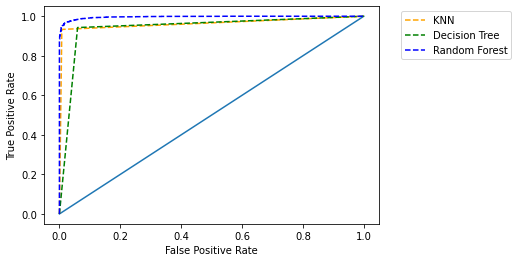

In [111]:
plt.plot([0,1],[0,1],linestyle= '-')
plt.plot(fpr,tpr,linestyle='--',color='orange',label = 'KNN')
plt.plot(fpr_dc,tpr_dc,linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,linestyle='--',color='blue', label='Random Forest')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(bbox_to_anchor=(1.05, 1) ,loc='upper left')